In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Key factors that influence US home Prices this are UNEMPLOYMENTRATE,MORTGAGE,GDP,FORECLOSURES,HPI,PERMIT NUMBER","CONSTRUCTION","HOMES SOLD","HOUSING Starts"

In [2]:
df=pd.read_csv("HPI Factor Data.csv")

In [3]:
df

,DATE,UNEMPLOYMENT RATE,MORTGAGE,GDP,FORECLOSURES,YEAR,HPI,AVG_VALUES(HPI),PERMIT NUMBER,CONSTRUCTION,HOMES SOLD,HOUSING STARTS
0,01-01-2003,5.87,5.84,13619.434,1.97,2003,129.32,0.00,1808,417788,999.0,1853
1,01-04-2003,6.13,5.51,13741.107,1.83,2003,131.76,0.00,1803,420510,1012.0,1643
2,01-07-2003,6.13,6.03,13970.157,1.73,2003,135.01,0.00,1885,448917,1168.0,1897
3,01-10-2003,5.83,5.92,14131.379,1.76,2003,138.83,133.73,2012,469855,1144.0,1967
4,01-01-2004,5.70,5.60,14212.340,1.65,2004,143.30,0.00,1952,498640,1165.0,1911
...,...,...,...,...,...,...,...,...,...,...,...,...
79,01-10-2022,3.71,5.50,214125.310,3.90,2022,300.00,289.95,1634,852378,NaN,1594
80,01-01-2023,3.40,6.71,215601.280,4.15,2023,310.00,0.00,1660,881655,NaN,1586
81,01-04-2023,3.40,6.89,216004.530,4.38,2023,322.68,0.00,1670,901245,NaN,1579
82,01-07-2023,3.50,7.15,223415.800,4.89,2023,329.79,0.00,1695,912389,NaN,1574


 HPI is House Price Index which is measure designed to capture changes in the values of single family homes in the US as a whole,in various regions of the country.In this dataset HPI is our output variable .

EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               84 non-null     object 
 1   UNEMPLOYMENT RATE  84 non-null     float64
 2   MORTGAGE           84 non-null     float64
 3   GDP                84 non-null     float64
 4   FORECLOSURES       84 non-null     float64
 5   YEAR               84 non-null     int64  
 6   HPI                84 non-null     float64
 7   AVG_VALUES(HPI)    84 non-null     float64
 8   PERMIT NUMBER      84 non-null     int64  
 9   CONSTRUCTION       84 non-null     int64  
 10  HOMES SOLD         72 non-null     float64
 11  HOUSING STARTS     84 non-null     int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 8.0+ KB


In [5]:
df.head()

,DATE,UNEMPLOYMENT RATE,MORTGAGE,GDP,FORECLOSURES,YEAR,HPI,AVG_VALUES(HPI),PERMIT NUMBER,CONSTRUCTION,HOMES SOLD,HOUSING STARTS
0,01-01-2003,5.87,5.84,13619.434,1.97,2003,129.32,0.00,1808,417788,999.0,1853
1,01-04-2003,6.13,5.51,13741.107,1.83,2003,131.76,0.00,1803,420510,1012.0,1643
2,01-07-2003,6.13,6.03,13970.157,1.73,2003,135.01,0.00,1885,448917,1168.0,1897
3,01-10-2003,5.83,5.92,14131.379,1.76,2003,138.83,133.73,2012,469855,1144.0,1967
4,01-01-2004,5.70,5.60,14212.340,1.65,2004,143.30,0.00,1952,498640,1165.0,1911


In [6]:
df.shape

(84, 12)

In [7]:
df.columns

Index(['DATE', 'UNEMPLOYMENT RATE', 'MORTGAGE', 'GDP', 'FORECLOSURES', 'YEAR',
       'HPI', 'AVG_VALUES(HPI)', 'PERMIT NUMBER', 'CONSTRUCTION', 'HOMES SOLD',
       'HOUSING STARTS'],
      dtype='object')

In [8]:
# Checking null values 
df.isnull().sum()

DATE                  0
UNEMPLOYMENT RATE     0
MORTGAGE              0
GDP                   0
FORECLOSURES          0
YEAR                  0
HPI                   0
AVG_VALUES(HPI)       0
PERMIT NUMBER         0
CONSTRUCTION          0
HOMES SOLD           12
HOUSING STARTS        0
dtype: int64

In [9]:
df.describe()

,UNEMPLOYMENT RATE,MORTGAGE,GDP,FORECLOSURES,YEAR,HPI,AVG_VALUES(HPI),PERMIT NUMBER,CONSTRUCTION,HOMES SOLD,HOUSING STARTS
count,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,72.000000,84.000000
mean,5.91500,4.803452,37263.188964,4.949881,2013.000000,187.102262,46.820119,1311.142857,491220.083333,662.513889,1267.238095
std,2.04043,1.128433,60301.060283,3.180653,6.091669,50.270540,85.304969,470.066238,178074.227343,310.969814,458.834974
min,3.40000,2.760000,13619.434000,1.410000,2003.000000,129.320000,0.000000,521.000000,236512.000000,283.000000,478.000000
25%,4.50000,3.895000,15450.455000,2.435000,2008.000000,148.232500,0.000000,1005.250000,360223.000000,409.000000,921.000000
50%,5.36500,4.525000,16529.572500,3.680000,2013.000000,174.975000,0.000000,1314.500000,498275.500000,574.000000,1250.500000
75%,7.00500,5.840000,18405.765500,7.517500,2018.000000,204.202500,33.432500,1614.000000,575661.000000,903.500000,1575.250000
max,13.07000,7.300000,223415.800000,11.540000,2023.000000,350.000000,328.110000,2212.000000,941278.000000,1389.000000,2273.000000


Key observation from the statistical summary of the data 
1.The gap between mean & 50% are high in GDP . So there is a possibility of little skewness.
2. The gap between 75 percentile & max values in HPI is high so there is a  possibility of outlier.


In [10]:
# values of HOUSING STARTS Columns are in numeric form so we can fill null values of this column with median .
    
df["HOMES SOLD"].fillna(1251,inplace=True)

In [11]:
df.isnull().sum()

DATE                 0
UNEMPLOYMENT RATE    0
MORTGAGE             0
GDP                  0
FORECLOSURES         0
YEAR                 0
HPI                  0
AVG_VALUES(HPI)      0
PERMIT NUMBER        0
CONSTRUCTION         0
HOMES SOLD           0
HOUSING STARTS       0
dtype: int64

In [12]:
df.dtypes

DATE                  object
UNEMPLOYMENT RATE    float64
MORTGAGE             float64
GDP                  float64
FORECLOSURES         float64
YEAR                   int64
HPI                  float64
AVG_VALUES(HPI)      float64
PERMIT NUMBER          int64
CONSTRUCTION           int64
HOMES SOLD           float64
HOUSING STARTS         int64
dtype: object

In [13]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

01-01-2003    1
01-04-2016    1
01-04-2018    1
01-01-2018    1
01-10-2017    1
             ..
01-07-2009    1
01-04-2009    1
01-01-2009    1
01-10-2008    1
01-10-2023    1
Name: DATE, Length: 84, dtype: int64


4.50    4
5.43    3
4.97    2
3.60    2
9.63    2
       ..
7.80    1
7.73    1
7.23    1
6.93    1
3.90    1
Name: UNEMPLOYMENT RATE, Length: 69, dtype: int64


5.84    2
4.92    2
3.98    2
3.92    2
4.29    2
       ..
3.55    1
3.36    1
5.51    1
3.67    1
7.30    1
Name: MORTGAGE, Length: 77, dtype: int64


13619.434    1
17618.581    1
18590.004    1
18436.262    1
18296.685    1
            ..
15216.647    1
15161.772    1
15187.475    1
15366.607    1
22350.900    1
Name: GDP, Length: 84, dtype: int64


5.10     2
3.68     2
1.55     2
3.90     2
4.15     2
        ..
10.36    1
9.46     1
8.58     1
8.02     1
4.89     1
Name: FORECLOSURES, Length: 78, dtype: int64


2003    4
2014    4
2022    4
2021    4
2020    4
2019    4
2018    4
2017    4
2016    4
2015    4

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UNEMPLOYMENT RATE', ylabel='Density'>

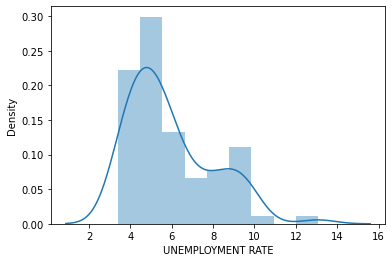

In [14]:
# Univariate Analysis

sns.distplot(df["UNEMPLOYMENT RATE"])


C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MORTGAGE', ylabel='Density'>

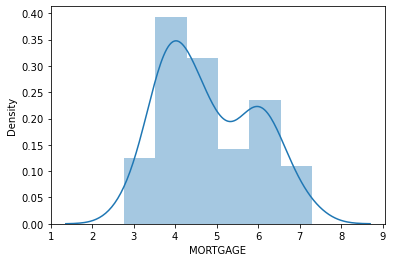

In [15]:
sns.distplot(df["MORTGAGE"])

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HPI', ylabel='Density'>

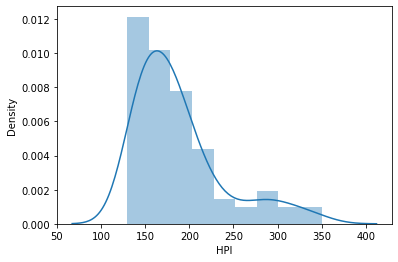

In [16]:
sns.distplot(df["HPI"])

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

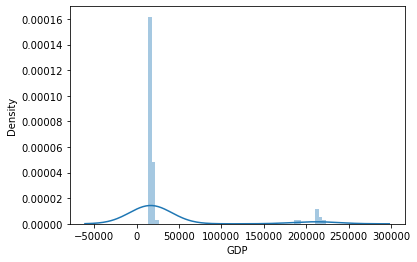

In [17]:
sns.distplot(df["GDP"])

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FORECLOSURES', ylabel='Density'>

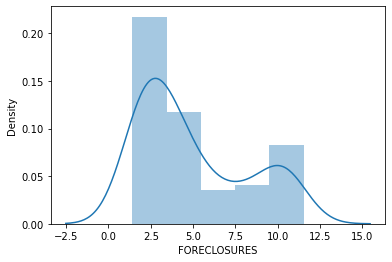

In [18]:
sns.distplot(df["FORECLOSURES"])

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PERMIT NUMBER', ylabel='Density'>

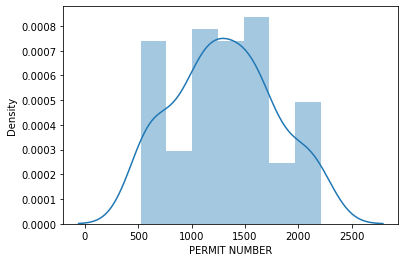

In [19]:
sns.distplot(df["PERMIT NUMBER"])

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CONSTRUCTION', ylabel='Density'>

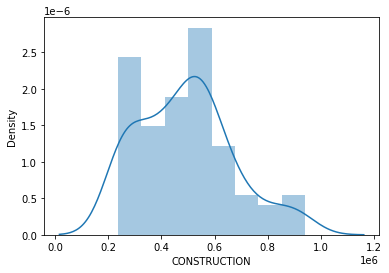

In [20]:
sns.distplot(df["CONSTRUCTION"])

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HOMES SOLD', ylabel='Density'>

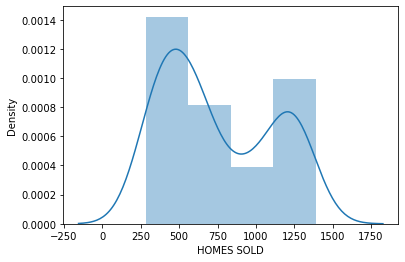

In [21]:
sns.distplot(df["HOMES SOLD"])

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HOUSING STARTS', ylabel='Density'>

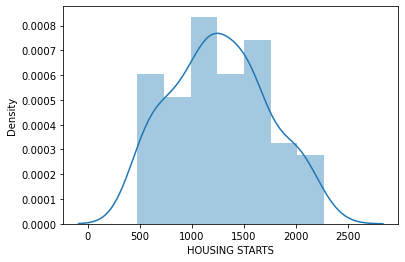

In [22]:
sns.distplot(df["HOUSING STARTS"])

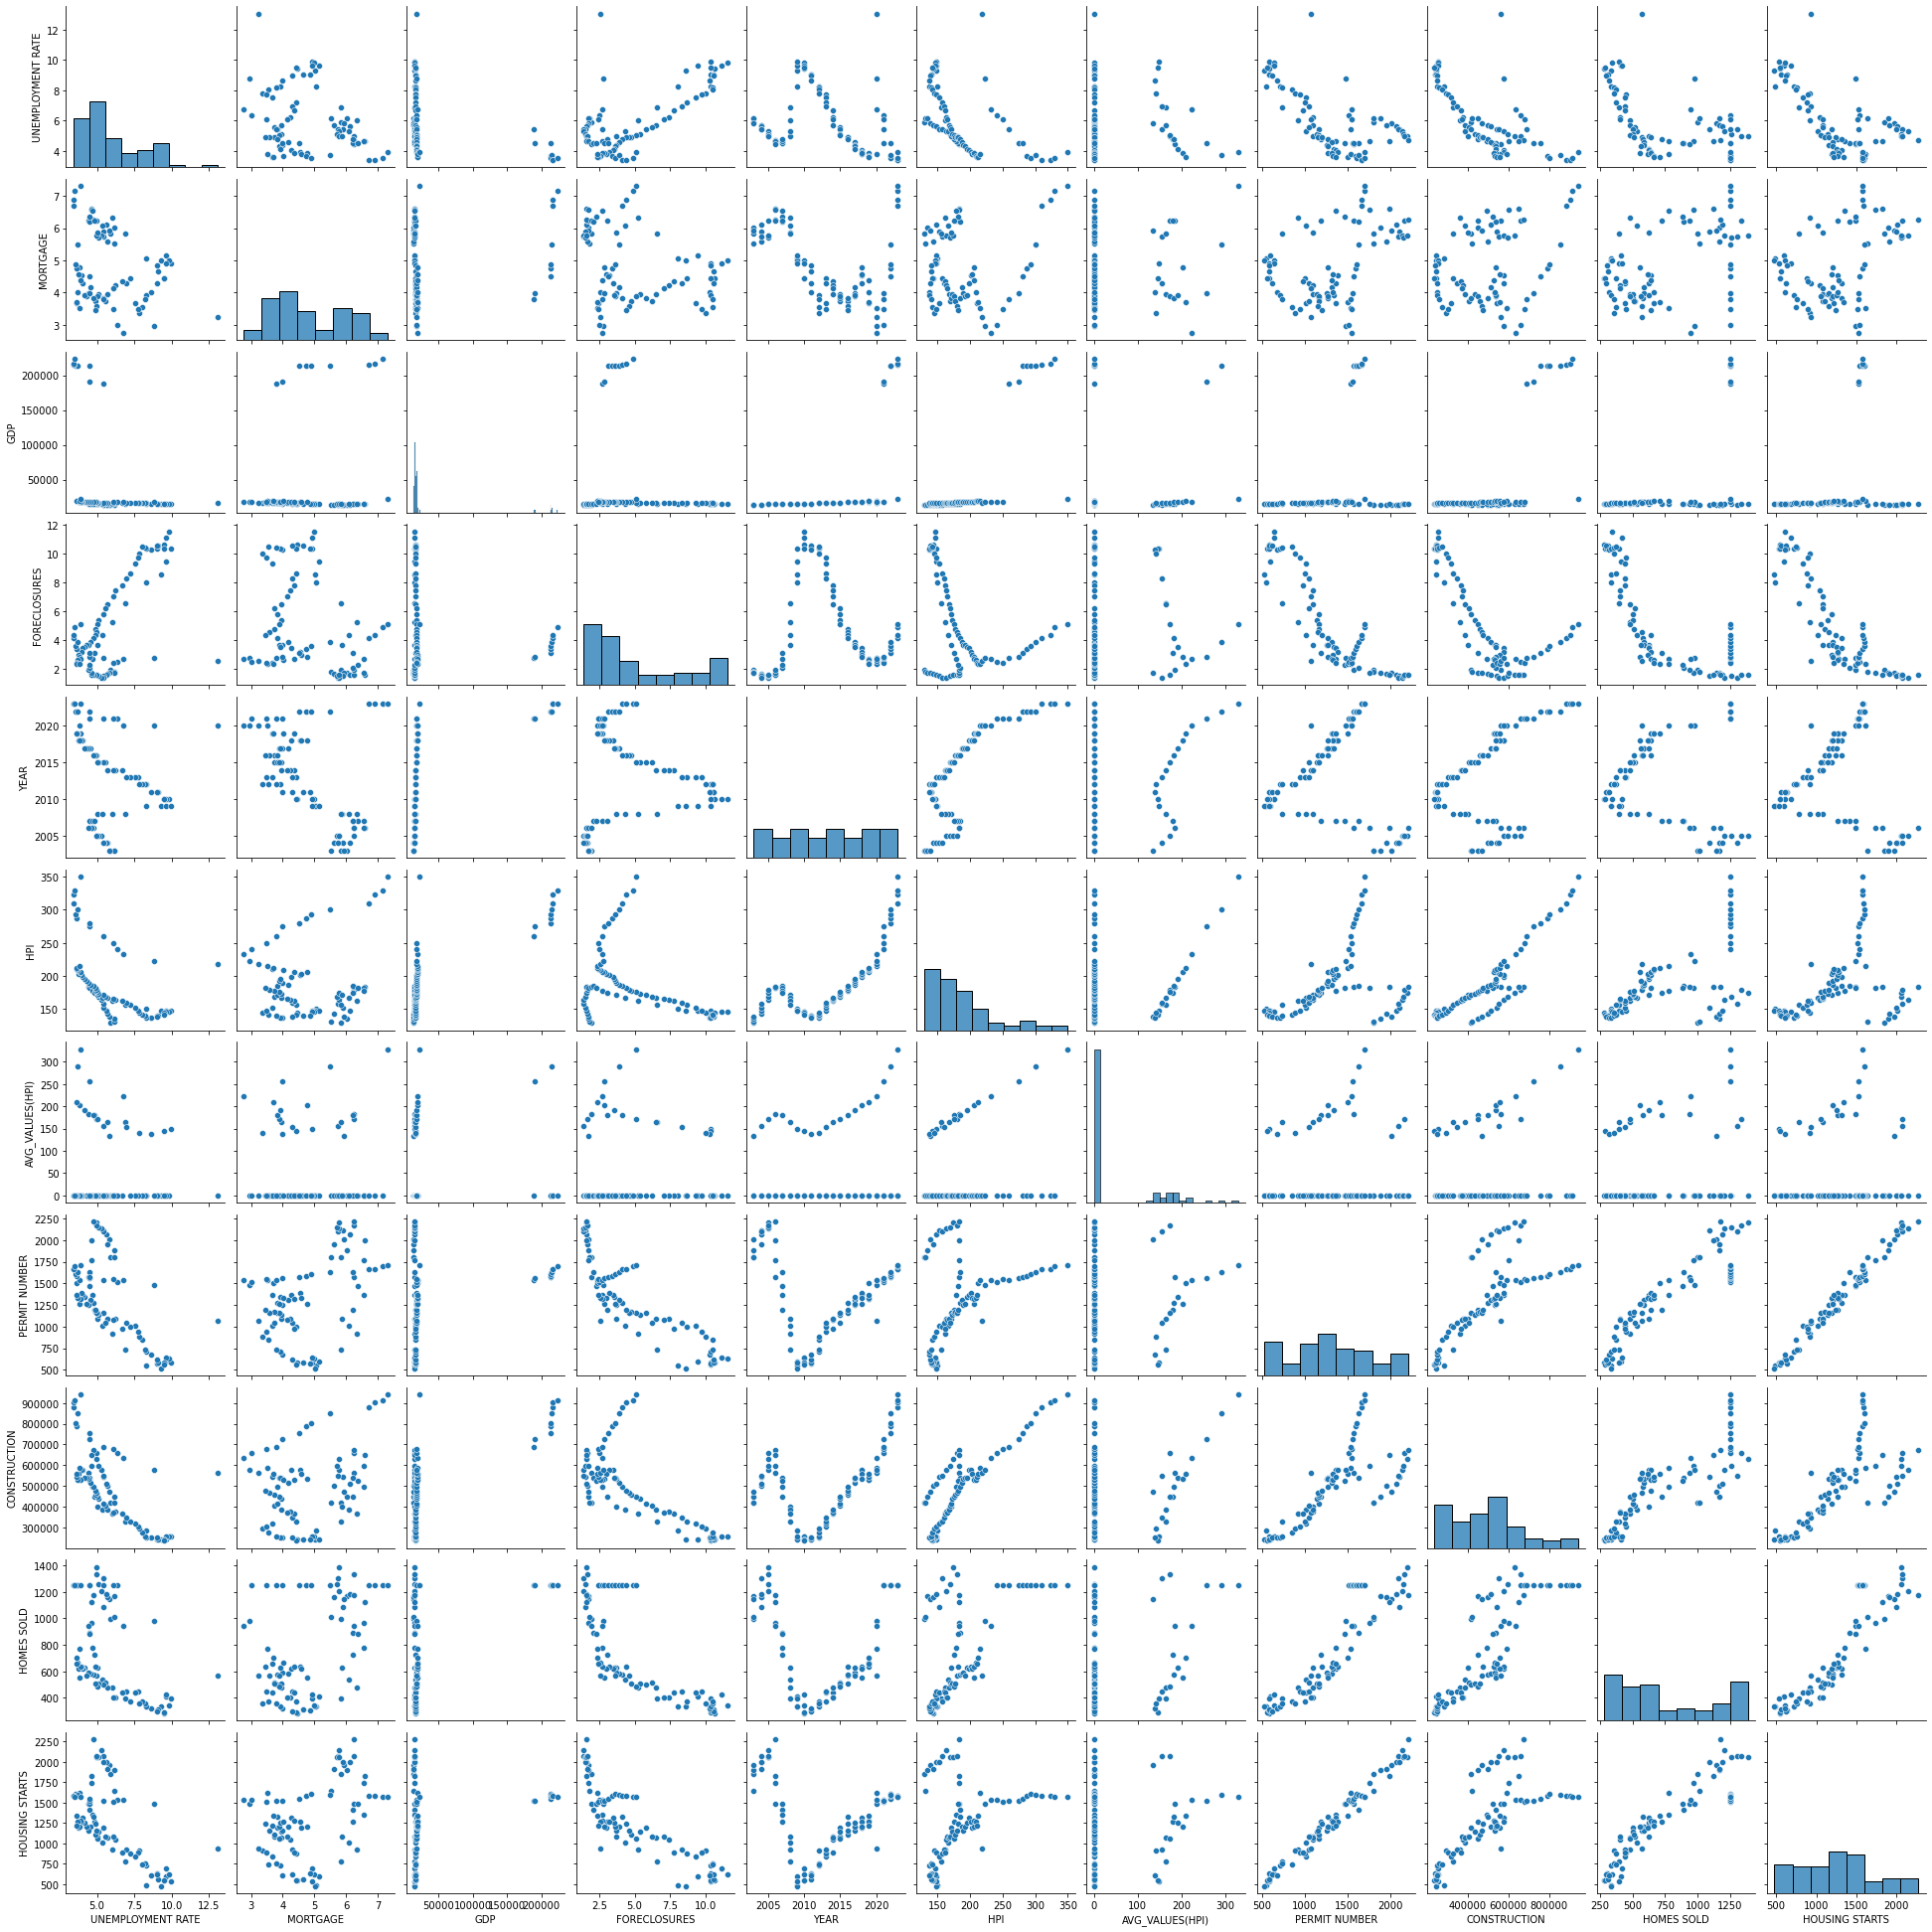

In [23]:
sns.pairplot(df)

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVG_VALUES(HPI)', ylabel='Density'>

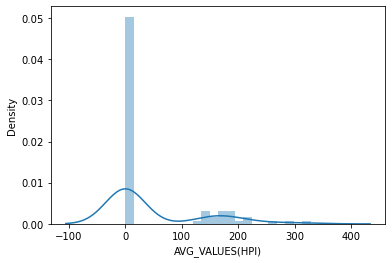

In [24]:
sns.distplot(df["AVG_VALUES(HPI)"])

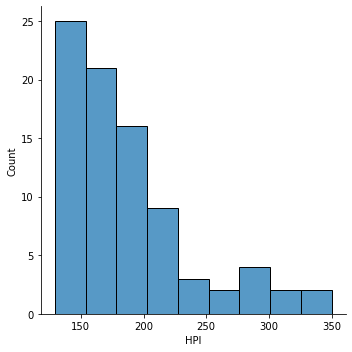

In [25]:
sns.displot(df["HPI"])

BIVARIATE ANALYSIS

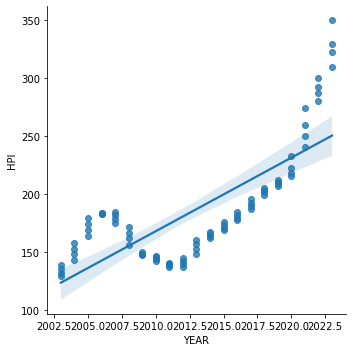

In [26]:
sns.lmplot(x="YEAR",y="HPI",data=df)

 from this diagram we can see that after 2020 year HPI values increses high.

<AxesSubplot:xlabel='GDP', ylabel='HPI'>

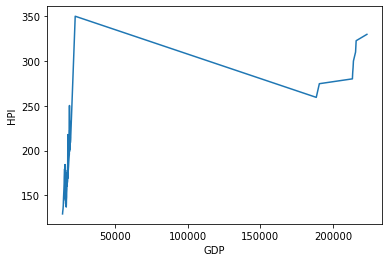

In [27]:
sns.lineplot(x="GDP",y="HPI",data=df)

from this diagram we can see that when GDP is high then HPI is also high.

<AxesSubplot:xlabel='UNEMPLOYMENT RATE', ylabel='HPI'>

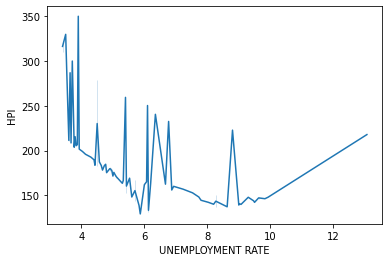

In [28]:
sns.lineplot(x="UNEMPLOYMENT RATE",y="HPI",data=df)

 from this diagram HPI value is high when unemployment rate 4.5

<AxesSubplot:xlabel='MORTGAGE', ylabel='HPI'>

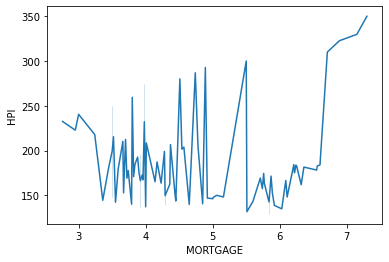

In [29]:
sns.lineplot(x="MORTGAGE",y="HPI",data=df)

 Basically when HPI rises, lenders may offer lower interest rate to attact borrowers and while decling HPI mortage rate is decreasing.Here in this diagram we can see this same result that when HPI is too high then mortgage rate is less & vice-versa.

<AxesSubplot:xlabel='CONSTRUCTION', ylabel='HPI'>

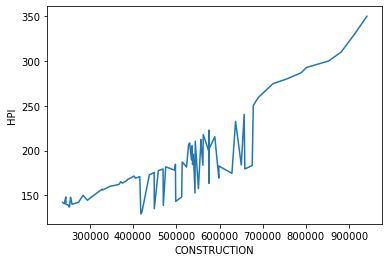

In [30]:
sns.lineplot(x="CONSTRUCTION",y="HPI",data=df)

from this we can see that when  construction in Industry increases then HPI also increases.

<AxesSubplot:xlabel='HOMES SOLD', ylabel='HPI'>

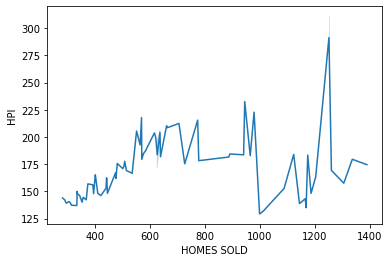

In [31]:
sns.lineplot(x="HOMES SOLD",y="HPI",data=df)

When HPI increases then tendency of homes solding also increases.

<AxesSubplot:xlabel='HOUSING STARTS', ylabel='HPI'>

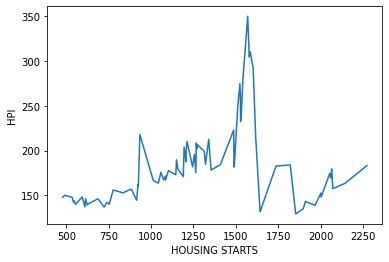

In [32]:
sns.lineplot(x="HOUSING STARTS",y="HPI",data=df)

From this diagrame we can see that HPI & Housing starts are inversely related to each other.When housing starts is too high then hpi is not too high & vice_versa.

<AxesSubplot:xlabel='FORECLOSURES', ylabel='HPI'>

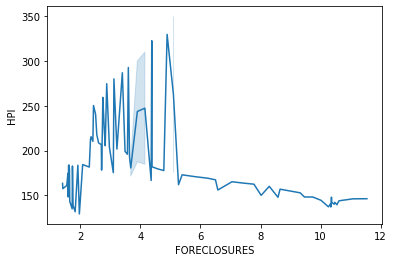

In [33]:
sns.lineplot(x="FORECLOSURES",y="HPI",data=df)

from this diagram we can see that when HPI is too high then foreclosures is not too high & vice_versa.

<AxesSubplot:xlabel='PERMIT NUMBER', ylabel='HPI'>

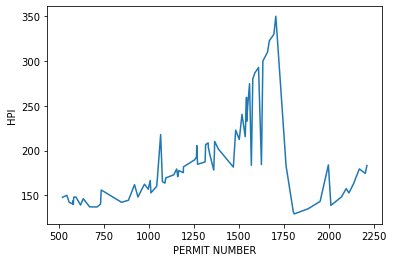

In [34]:
sns.lineplot(x="PERMIT NUMBER",y="HPI",data=df)

from this figure we can see that when hpi is too high then permit number is not too high & vice_versa.

In [35]:
df.skew()

C:\Users\rikug\AppData\Local\Temp\ipykernel_10252\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


UNEMPLOYMENT RATE    1.018420
MORTGAGE             0.351700
GDP                  2.601354
FORECLOSURES         0.750293
YEAR                 0.000000
HPI                  1.478356
AVG_VALUES(HPI)      1.533138
PERMIT NUMBER        0.111078
CONSTRUCTION         0.497768
HOMES SOLD           0.389688
HOUSING STARTS       0.152082
dtype: float64

skewness range in between -0.5 to +0.5 not to be removed. Skewsness of UNEMPLOYMENT RATE ,GDP,FORECLOSURES,HPI,AVG_VALUES(HPI) need to be removed.

In [36]:
df["UNEMPLOYMENT RATE"]=np.cbrt(df["UNEMPLOYMENT RATE"])

In [37]:
df["GDP"]=np.log(df["GDP"])

In [38]:
df["FORECLOSURES"]=np.cbrt(df["FORECLOSURES"])

In [39]:
df["HPI"]=np.log(df["HPI"])

In [40]:
df["AVG_VALUES(HPI)"]=np.log(df["AVG_VALUES(HPI)"])

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


So In this way skewness are removed.

In [41]:
# checking correlation

df=df.corr()
df

,UNEMPLOYMENT RATE,MORTGAGE,GDP,FORECLOSURES,YEAR,HPI,AVG_VALUES(HPI),PERMIT NUMBER,CONSTRUCTION,HOMES SOLD,HOUSING STARTS
UNEMPLOYMENT RATE,1.000000,-0.284736,-0.410552,0.631777,-0.323683,-0.620997,-0.689989,-0.626882,-0.740653,-0.540370,-0.614776
MORTGAGE,-0.284736,1.000000,0.113506,-0.330825,-0.475037,0.064918,0.190069,0.426440,0.305882,0.454632,0.420074
GDP,-0.410552,0.113506,1.000000,-0.079360,0.613005,0.766572,0.653388,0.207061,0.659221,0.473245,0.206722
FORECLOSURES,0.631777,-0.330825,-0.079360,1.000000,0.102411,-0.352116,-0.330479,-0.897029,-0.664609,-0.784370,-0.893280
YEAR,-0.323683,-0.475037,0.613005,0.102411,1.000000,0.783679,0.780119,-0.110683,0.486675,0.042893,-0.125018
HPI,-0.620997,0.064918,0.766572,-0.352116,0.783679,1.000000,0.995487,0.378391,0.890571,0.564785,0.362559
AVG_VALUES(HPI),-0.689989,0.190069,0.653388,-0.330479,0.780119,0.995487,1.000000,0.390388,0.893176,0.553352,0.366630
PERMIT NUMBER,-0.626882,0.426440,0.207061,-0.897029,-0.110683,0.378391,0.390388,1.000000,0.742914,0.903808,0.990364
CONSTRUCTION,-0.740653,0.305882,0.659221,-0.664609,0.486675,0.890571,0.893176,0.742914,1.000000,0.836939,0.727039
HOMES SOLD,-0.540370,0.454632,0.473245,-0.784370,0.042893,0.564785,0.553352,0.903808,0.836939,1.000000,0.904789


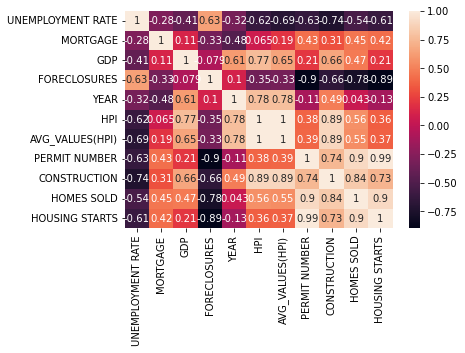

In [42]:
sns.heatmap(df,annot=True)
plt.figure=((6,6))


In [43]:
# lighter shades are represents high correlation & dark shades are represents negative correlation.HOMES SOLD & HOUSING STARTS are highly correlated to each other.

In [44]:
from sklearn.preprocessing import StandardScaler

In [51]:
st=StandardScaler()


In [52]:
x=st.fit_transform(x)

In [53]:
x

array([[ 2.36618916, -1.1259351 , -2.00656186,  1.47583096, -1.20650043,
        -2.1782256 , -1.54784229, -2.07446539, -1.66082389, -1.52619094],
       [ 0.01477007,  2.04563503, -0.67989045, -0.16094599, -1.52358613,
        -0.47659812,  0.19325645, -0.27678353,  0.09484133,  0.19262425],
       [-0.21550776, -0.14281472,  1.56430536,  0.26663604,  0.75585265,
         0.4192501 , -0.16936839,  0.33016305,  0.12768368, -0.16173943],
       [ 1.6922407 , -1.23971272, -1.16813724,  2.10194462, -0.3138379 ,
        -1.48309901, -1.99438406, -1.94384115, -2.09135618, -1.98876653],
       [-0.05651382, -1.59572333,  0.58461187,  0.5757132 ,  1.56660439,
         0.66428816, -0.69458609,  0.03377282, -0.63166641, -0.71273577],
       [-0.60068111, -0.26276003,  0.97337389, -0.19714973,  1.11341465,
         1.08071134,  0.1138326 ,  0.72756212,  0.28920466,  0.09709541],
       [-0.72695424,  0.04619314,  0.68684439, -0.16035876,  1.10595451,
         1.08943813,  0.13366429,  0.73203843

In [54]:
# checking the outliers


from scipy.stats import zscore

In [55]:
z=np.abs(zscore(df))
z

,UNEMPLOYMENT RATE,MORTGAGE,GDP,FORECLOSURES,YEAR,HPI,AVG_VALUES(HPI),PERMIT NUMBER,CONSTRUCTION,HOMES SOLD,HOUSING STARTS
UNEMPLOYMENT RATE,2.366189,1.125935,2.006562,1.475831,1.206500,2.041104,2.178226,1.547842,2.074465,1.660824,1.526191
MORTGAGE,0.014770,2.045635,0.679890,0.160946,1.523586,0.720872,0.476598,0.193256,0.276784,0.094841,0.192624
GDP,0.215508,0.142815,1.564305,0.266636,0.755853,0.629655,0.419250,0.169368,0.330163,0.127684,0.161739
FORECLOSURES,1.692241,1.239713,1.168137,2.101945,0.313838,1.523569,1.483099,1.994384,1.943841,2.091356,1.988767
YEAR,0.056514,1.595723,0.584612,0.575713,1.566604,0.662582,0.664288,0.694586,0.033773,0.631666,0.712736
HPI,0.600681,0.262760,0.973374,0.197150,1.113415,1.078950,1.080711,0.113833,0.727562,0.289205,0.097095
AVG_VALUES(HPI),0.726954,0.046193,0.686844,0.160359,1.105955,1.070263,1.089438,0.133664,0.732038,0.269030,0.103858
PERMIT NUMBER,0.611453,0.629713,0.443051,1.123702,0.760268,0.117508,0.089271,1.141327,0.473926,0.887404,1.139838
CONSTRUCTION,0.819684,0.332098,0.701611,0.728502,0.491193,0.868323,0.882890,0.716375,0.915534,0.769415,0.702473
HOMES SOLD,0.453112,0.699310,0.230805,0.932139,0.438528,0.241260,0.225825,0.982325,0.635436,1.057133,0.997703


In [48]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [88]:
df_new=df[(z<3).all(axis=1)]
df_new

,UNEMPLOYMENT RATE,MORTGAGE,GDP,FORECLOSURES,YEAR,HPI,AVG_VALUES(HPI),PERMIT NUMBER,CONSTRUCTION,HOMES SOLD,HOUSING STARTS
UNEMPLOYMENT RATE,1.000000,-0.284736,-0.410552,0.631777,-0.323683,-0.620997,-0.689989,-0.626882,-0.740653,-0.540370,-0.614776
MORTGAGE,-0.284736,1.000000,0.113506,-0.330825,-0.475037,0.064918,0.190069,0.426440,0.305882,0.454632,0.420074
GDP,-0.410552,0.113506,1.000000,-0.079360,0.613005,0.766572,0.653388,0.207061,0.659221,0.473245,0.206722
FORECLOSURES,0.631777,-0.330825,-0.079360,1.000000,0.102411,-0.352116,-0.330479,-0.897029,-0.664609,-0.784370,-0.893280
YEAR,-0.323683,-0.475037,0.613005,0.102411,1.000000,0.783679,0.780119,-0.110683,0.486675,0.042893,-0.125018
HPI,-0.620997,0.064918,0.766572,-0.352116,0.783679,1.000000,0.995487,0.378391,0.890571,0.564785,0.362559
AVG_VALUES(HPI),-0.689989,0.190069,0.653388,-0.330479,0.780119,0.995487,1.000000,0.390388,0.893176,0.553352,0.366630
PERMIT NUMBER,-0.626882,0.426440,0.207061,-0.897029,-0.110683,0.378391,0.390388,1.000000,0.742914,0.903808,0.990364
CONSTRUCTION,-0.740653,0.305882,0.659221,-0.664609,0.486675,0.890571,0.893176,0.742914,1.000000,0.836939,0.727039
HOMES SOLD,-0.540370,0.454632,0.473245,-0.784370,0.042893,0.564785,0.553352,0.903808,0.836939,1.000000,0.904789


In [90]:
df_new.shape

(11, 11)

Outliers are remove.

In [91]:
x=df.drop("HPI",axis=1).copy()
x

,UNEMPLOYMENT RATE,MORTGAGE,GDP,FORECLOSURES,YEAR,AVG_VALUES(HPI),PERMIT NUMBER,CONSTRUCTION,HOMES SOLD,HOUSING STARTS
UNEMPLOYMENT RATE,1.000000,-0.284736,-0.410552,0.631777,-0.323683,-0.689989,-0.626882,-0.740653,-0.540370,-0.614776
MORTGAGE,-0.284736,1.000000,0.113506,-0.330825,-0.475037,0.190069,0.426440,0.305882,0.454632,0.420074
GDP,-0.410552,0.113506,1.000000,-0.079360,0.613005,0.653388,0.207061,0.659221,0.473245,0.206722
FORECLOSURES,0.631777,-0.330825,-0.079360,1.000000,0.102411,-0.330479,-0.897029,-0.664609,-0.784370,-0.893280
YEAR,-0.323683,-0.475037,0.613005,0.102411,1.000000,0.780119,-0.110683,0.486675,0.042893,-0.125018
HPI,-0.620997,0.064918,0.766572,-0.352116,0.783679,0.995487,0.378391,0.890571,0.564785,0.362559
AVG_VALUES(HPI),-0.689989,0.190069,0.653388,-0.330479,0.780119,1.000000,0.390388,0.893176,0.553352,0.366630
PERMIT NUMBER,-0.626882,0.426440,0.207061,-0.897029,-0.110683,0.390388,1.000000,0.742914,0.903808,0.990364
CONSTRUCTION,-0.740653,0.305882,0.659221,-0.664609,0.486675,0.893176,0.742914,1.000000,0.836939,0.727039
HOMES SOLD,-0.540370,0.454632,0.473245,-0.784370,0.042893,0.553352,0.903808,0.836939,1.000000,0.904789


In [92]:
y=df["HPI"].copy()
y

UNEMPLOYMENT RATE   -0.620997
MORTGAGE             0.064918
GDP                  0.766572
FORECLOSURES        -0.352116
YEAR                 0.783679
HPI                  1.000000
AVG_VALUES(HPI)      0.995487
PERMIT NUMBER        0.378391
CONSTRUCTION         0.890571
HOMES SOLD           0.564785
HOUSING STARTS       0.362559
Name: HPI, dtype: float64

Model Building

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [95]:
x_train.shape

(8, 10)

In [96]:
y_train.shape

(8,)

In [97]:
x_test.shape

(3, 10)

In [98]:
y_test.shape

(3,)

In [99]:
lm=LinearRegression()

In [100]:
lm.fit(x_train,y_train)

LinearRegression()

In [101]:
lm.coef_

array([-0.06864808,  0.07426073,  0.02649515,  0.20789295,  0.39321032,
        0.32285693, -0.12074366,  0.29841372,  0.21747861,  0.1420644 ])

In [102]:
lm.intercept_

-0.03603577455573109

In [103]:
lm.score(x_train,y_train)

1.0

That mean model is 100 percent accurate

In [104]:
# predict the value
pred=lm.predict(x_test)
print("predicted result price :",pred)
print("actual price",y_test)

predicted result price : [ 0.98247957 -0.70559282  0.5664558 ]
actual price HPI                  1.000000
UNEMPLOYMENT RATE   -0.620997
HOMES SOLD           0.564785
Name: HPI, dtype: float64


In [105]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9946962310153433


In [106]:
from sklearn.linear_model import Ridge,Lasso
rdg=Ridge(alpha=0.0001,random_state=45)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.9999990586810753

That mean this model accuracy is 99%

In [107]:
rdg.coef_

array([-0.07959561,  0.07284612,  0.03393145,  0.20597208,  0.38837699,
        0.31152655, -0.04052448,  0.30919702,  0.19513609,  0.0677219 ])

In [108]:
las=Lasso(alpha=0.0001,random_state=45)
las.fit(x_train,y_train)
las.score(x_train,y_train)

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.808e-04, tolerance: 1.497e-04
  model = cd_fast.enet_coordinate_descent(


0.9998378310205006

This model also giving 99% accuracy.

In [109]:
las.coef_

array([-0.01112894,  0.11158608,  0.12265449, -0.        ,  0.41817586,
        0.32942799,  0.05207148,  0.24848499,  0.00336157,  0.        ])

Here we can see that LinearRegression model is best to fit & giving higher accuracy than Ridge & Lasso .

In [ ]:
#Note- Datasets are collected from Kaggle & some other websites.